In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
import django
import os

os.environ['DJANGO_SETTINGS_MODULE'] = 'dashboard.settings'
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

In [3]:
from ml.models import PrimaryDataSet
from hse_map.models import HseMap
from voter.models import ListEdition, Voter
from datetime import datetime
import numpy as np

In [4]:
edition_date = datetime.strptime('2022-08-05', '%Y-%m-%d')
edition = ListEdition.objects.get(date=edition_date)
# hd51 = HseMap.objects.get(district='051')
# hd51.edition = edition

In [5]:
voters = list(edition.voters_for_county('060'))
print(len(voters))
election_date = datetime.strptime('2022-05-24', '%Y-%m-%d')
p = PrimaryDataSet(voters, election_date)

845997


In [11]:
X,y = p.dataset

In [12]:
X

array([['WH', 'F', -84.41757649590238, 33.8532974237829, 1948],
       ['WH', 'M', -84.41757649590238, 33.8532974237829, 1972],
       ['WH', 'M', -84.41757649590238, 33.8532974237829, 1966],
       ...,
       ['BH', 'M', -84.23388657921305, 34.055501981710144, 2002],
       ['BH', 'M', -84.23388657921305, 34.055501981710144, 1966],
       ['WH', 'M', -84.23388657921305, 34.055501981710144, 1954]],
      dtype=object)

In [20]:
p.dosomething()

Epoch 1/100
1734/1734 - 2s - loss: 0.4075 - accuracy: 0.8119 - val_loss: 0.3846 - val_accuracy: 0.8241 - 2s/epoch - 1ms/step
Epoch 2/100
1734/1734 - 2s - loss: 0.3927 - accuracy: 0.8213 - val_loss: 0.3790 - val_accuracy: 0.8272 - 2s/epoch - 1ms/step
Epoch 3/100
1734/1734 - 2s - loss: 0.3906 - accuracy: 0.8231 - val_loss: 0.3784 - val_accuracy: 0.8289 - 2s/epoch - 1ms/step
Epoch 4/100
1734/1734 - 2s - loss: 0.3894 - accuracy: 0.8241 - val_loss: 0.3797 - val_accuracy: 0.8293 - 2s/epoch - 1ms/step
Epoch 5/100
1734/1734 - 2s - loss: 0.3884 - accuracy: 0.8250 - val_loss: 0.3793 - val_accuracy: 0.8295 - 2s/epoch - 1ms/step
Epoch 6/100
1734/1734 - 2s - loss: 0.3881 - accuracy: 0.8244 - val_loss: 0.3774 - val_accuracy: 0.8304 - 2s/epoch - 1ms/step
Epoch 7/100
1734/1734 - 2s - loss: 0.3875 - accuracy: 0.8256 - val_loss: 0.3764 - val_accuracy: 0.8317 - 2s/epoch - 1ms/step
Epoch 8/100
1734/1734 - 2s - loss: 0.3873 - accuracy: 0.8252 - val_loss: 0.3758 - val_accuracy: 0.8330 - 2s/epoch - 1ms/step


In [6]:
v = Voter.objects.filter(county__county_code='060').first()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


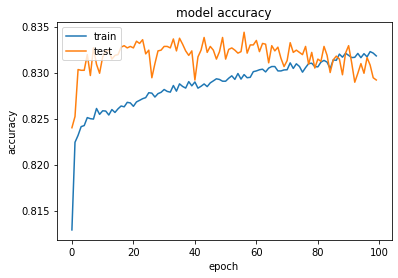

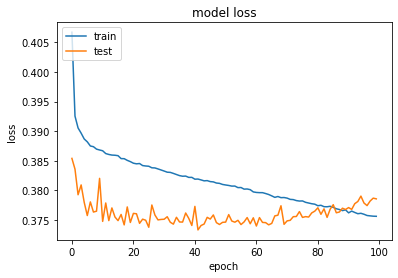

In [19]:
import matplotlib.pyplot as plt
history = p.history

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()